Student Name: Collin Czernel

Student ID: 

Please use this notebook to work on Task 2. You should not import any additional modules.

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

TEST DATA

In [3]:
a_x = 0.05
a_y= 10

In [44]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning toolboxes.


In [46]:
data.shape

(20, 2)

(24, 3)
(24, 2)


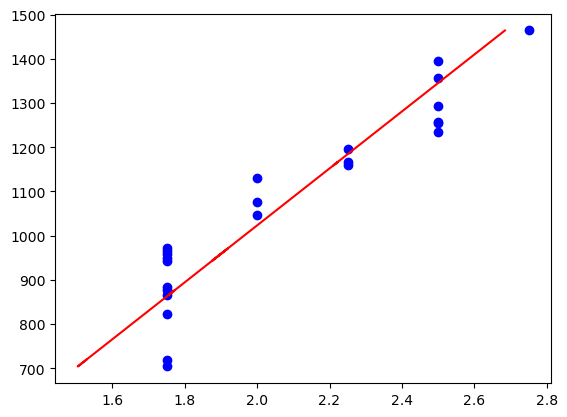

In [113]:
# Task #2

# I already did this before seeing Rebeccas note about using a random data matrix, and since I thought it was interesting applied to the 
# previously provided lr_data I am going to leave it here and do the random generated PCA below. Very cool to visualize the "pattern" of the PCA 
# data against the scattered original data showing that the PCA is outputting the best linear approximation of the original data.

class PCA_Analysis: # Setting up class attributes for later use
    def __init__(self, file):
        self.file = file
        self.data = None
        self.X = None
        self.pca = None
        self.X_pca = None
        self.X_inverse = None

    def load(self):
        # Loading the data in, making its own function for future use if we expand the usage
        self.data = np.loadtxt(self.file, delimiter=',')
        print(self.data.shape) # Just printing the data shape after import to use when validating the PCA processes are working as intended
        self.X = self.data[:, 1:3] # Reading the data and storing in self.X 

    def pca_func(self):
        self.pca = PCA(n_components=1)
        self.X_pca = self.pca.fit_transform(self.X) # Reducing to 1D
        self.X_inverse = self.pca.inverse_transform(self.X_pca) # "undoing" the reduction and moving back to 2D
        print(self.X_inverse.shape) # Again printing the shape of the final product to validate our processes worked 
        plt.scatter(self.X[:, 0], self.X[:, 1], color='blue')
        plt.plot(self.X_inverse[:, 0], self.X_inverse[:, 1], color='red')
        plt.show()

    def run(self): # Making a run function
        self.load()
        self.pca_func()
        
analysis = PCA_Analysis('lr_data.csv')
analysis.run()

# This was my first time using a class in Python, so I had to rely on a lot of StackOverflow and YouTube to figure out how to get this to even run.

(20, 2)
(20, 1)
(20, 2)


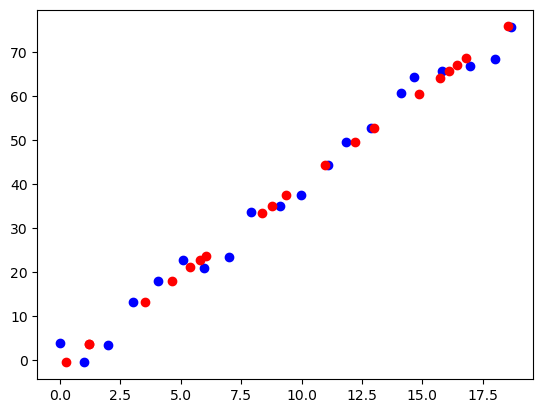

PCA Components found (to be matched with eigenvectors later on: [[-0.23315214 -0.97244027]]


In [115]:
# Now doing the actual task and using the random array generated with the code above :)

data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)]) # Random array from code above

def pca_random(data):
    print(data.shape) # Want to check the shape of the array before doing anything
    pca = PCA(n_components = 1) # Setting n component to 1 
    data_pca = pca.fit_transform(data) # Reducing the data from (20, 2) to (20, 1)
    print(data_pca.shape)
    data_inverse = pca.inverse_transform(data_pca) # Undoing the previous step and projecting back to 2D
    print(data_inverse.shape)
    plt.scatter(data[:, 0], data[:, 1], color='blue') # Making the original data blue
    plt.scatter(data_inverse[:, 0], data_inverse[:, 1], color='red') # making the new data red, we expect this to be a linear approximation of blue
    plt.show()
    print("PCA Components found (to be matched with eigenvectors later on: " + str(pca.components_))
pca_random(data)

# As we can see, the outputs are correctly aligned with the PCA transformations, and our output red line is the linear approximation of the
# Original data. I did not make this into a class as I did not have time this week. 

In [91]:
# Task 2 Part 2: Use Numpy to calculate the Eigen vectors of the data's covariance matrix and check your results using the output from the PCA 
# performed in step 1. This is really simple using Numpy. 

data_mc = data - np.mean(data, axis=0) # Loading data from above and using the np.mean feature 
cov_matrix = np.cov(data_mc.T) # Finding the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # Getting the eigenvectors using np.linalg.eig

#print(eigenvectors)
print("The first eigenvector is ["+str(eigenvectors[0][0]) +", "+str(eigenvectors[1][0])+"]")
print("The second eigenvector is ["+str(eigenvectors[0][1]) +", "+str(eigenvectors[1][1])+"]")

# So research has told me that the signs don't matter and don't effect the result. So the output below validates our program above after running several
# tests with random results. 

The first eigenvector is [-0.9710284985946205, 0.2389637104605578]
The second eigenvector is [-0.2389637104605578, -0.9710284985946205]


In [ ]:
"""
I thought this was a very interesting part of the assignment, and being able to visualize the impact of the PCA analysis and then tying that back into
the previous task with regards to linear regression was very interesting. I had to do a lot of research on the PCA processes but once I started reading
the sklearn documentation it was fairly straightforward to do the analysis. Using numpy to find the eigenvectors was also very straightforward once
the documentation was referenced. 

I had to look further into the eigenvectors and the PCA to see how they relate - more will be required, but for now I am confident that my code 
finding the eigenvectors validates the PCA processes done in the first part of the code. As it was my first time using classes, I did not do the whole
assignment in classes, and I relied heavily on StackOverflow and YouTube. 

I learned from Rebecca's reply to Henry's post regarding the PCA analysis, but I do not believe anyone in my group has submitted the assignment 
as of today, and since I am going away I have to submit it early. Most of my learning for this part of the project was just reading the documentation 
for sklearn and numpy which I found to be very straightforward and easy to use. 
"""